# Entrega final - Competencia 03 de Kaggle

- Explicación de los procesos afectuados
- Justificación de selección del "mejor" modelo
- Entrega adicional con promedios entre semilleríos

Alumno: Santiago Tedoldi

Comisión lunes

In [ ]:
# Librerias
import pandas as pd
import numpy as np

## Explicación de los procesos

### Definición del target

Trabajé usando un script de SQL con duckdb, según lo visto en la comisión de los lunes:

Notebook: comp03_target

### Preprocesamiento de los datos (prepro)

Tomando de base lo visto en la comisión de los lunes, y con ayuda de los notebooks de Ian Michel Link, evalué la calidad de los datos (nulos, zeros) y el data drifting observando los **últimos 6 meses de datos**.

Además, a las variables monetarias les aplique un proceso de corrección por deflación.

Notebook: comp03_prepro_6x

### Ingeniería de variables (fe)

**Enfoque conceptual en 6 meses + Lag1 + Delta1**, agregando para las demás variables lags y deltas de un mes previo. (~660 variables)

Notebook: comp03_fe6_6x

### Optimización bayesiana (opt)

Trabajé con optuna, optimizando de forma local (con un subsampleo de la clase CONTINUA del 10 % y con 12 meses de datos).

Cómo en la nube tardaba demesiado, solo logré entrenar un par de trials. La optimización local fue sobre un total de 60 iteraciones.

> lightgbm (local y en la nube)

Optimización local, con 60 iteraciones:

In [ ]:
{
    'n_estimators': 586,
    'num_leaves': 72,
    'learning_rate': 0.03225820947502308,
    'min_data_in_leaf': 182,
    'feature_fraction': 0.5612204369575097
}

En un back-testing de [202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105] vs 202107:

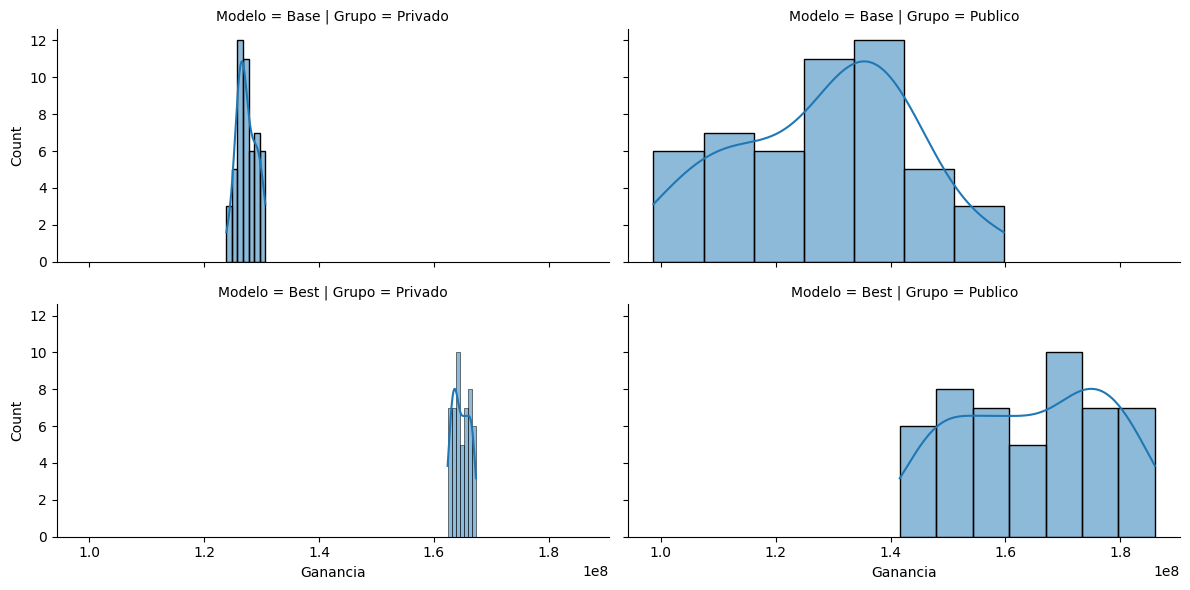

Ganancia media del modelo base en privado: 127355355.5

Ganancia media del modelo base en público: 128221800.0

Ganancia media del modelo Best en privado: 164743444.4

Ganancia media del modelo Best en público: 164969000.0

Optimización en nube (poca iteraciones)

In [ ]:
{
    'n_estimators': 522, 
    'num_leaves': 75, 
    'learning_rate': 0.015228897239224944, 
    'min_data_in_leaf': 157, 
    'feature_fraction': 0.47007968576605774
}

En un back-testing de [202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105] vs 202107:

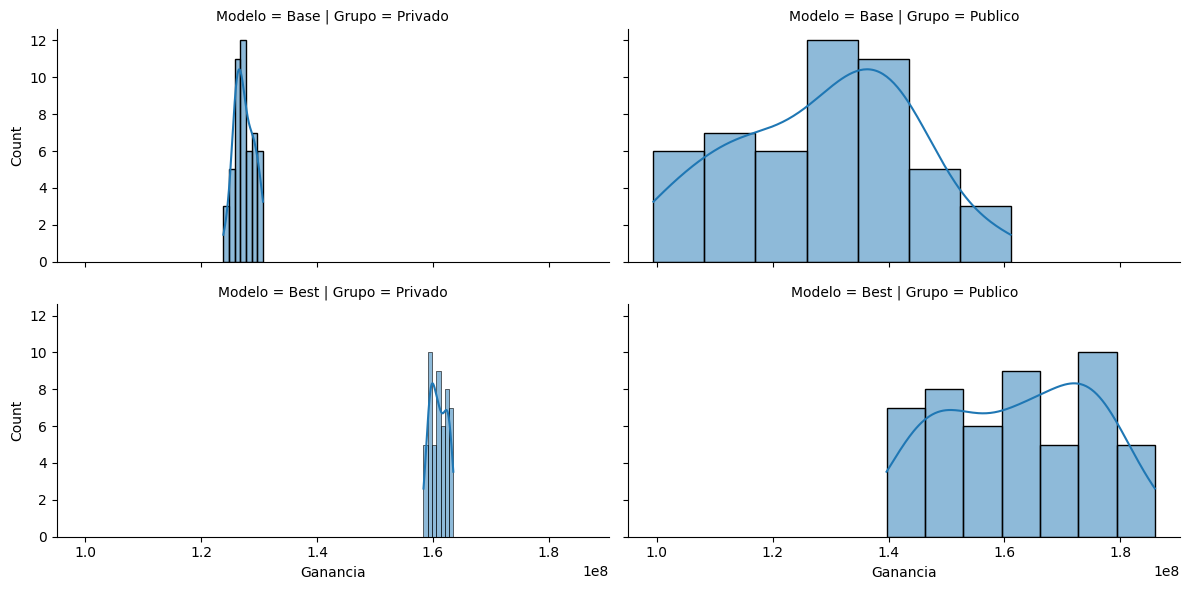

Ganancia media del modelo base en privado: 127421933.3

Ganancia media del modelo base en público: 128532600.0

Ganancia media del modelo Best en privado: 160979000.0

Ganancia media del modelo Best en público: 162519000.0

> lgbm semillerio de Denicolay

Analicé el modelo semillerio de Denicolay (presentado en la clase plenaria) para evaluar "optimización relativa"

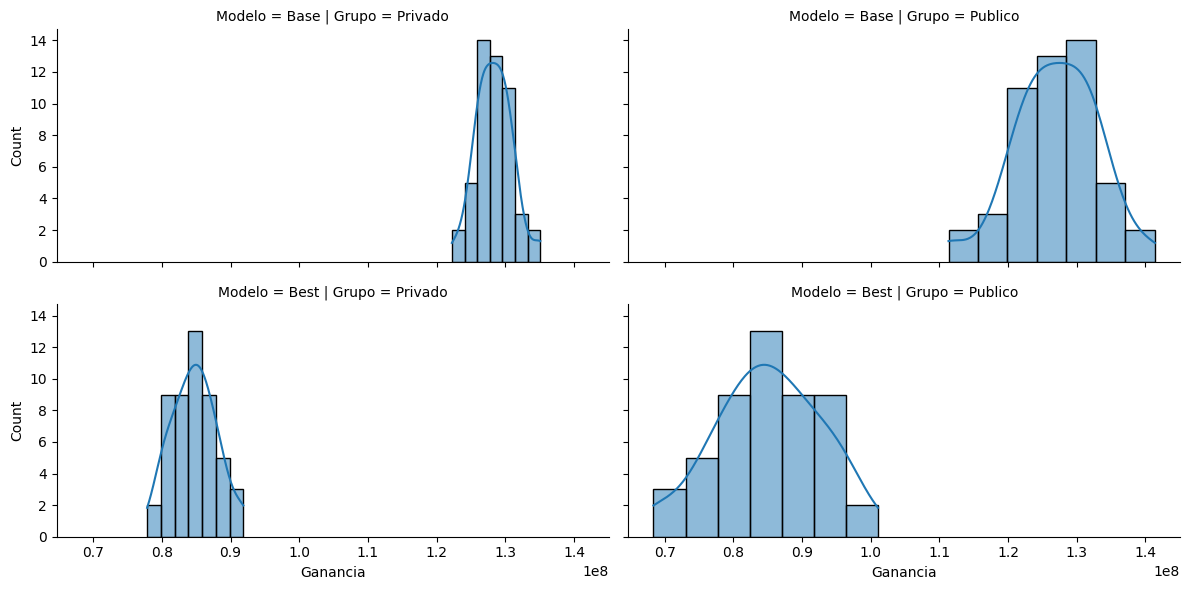

Observando que este modelo, por si solo, no es demasiado bueno, ni comparado contra el lgbm base.

## Justificación de selección

Pretendiendo identificar el mejor modelo con comparación de pipelines y backtesting.

### Comparación de pipelines

Notebook: comp02_pipeline_comp

Comparando los modelos optimizados en un back-testing de [202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105] vs 202107:

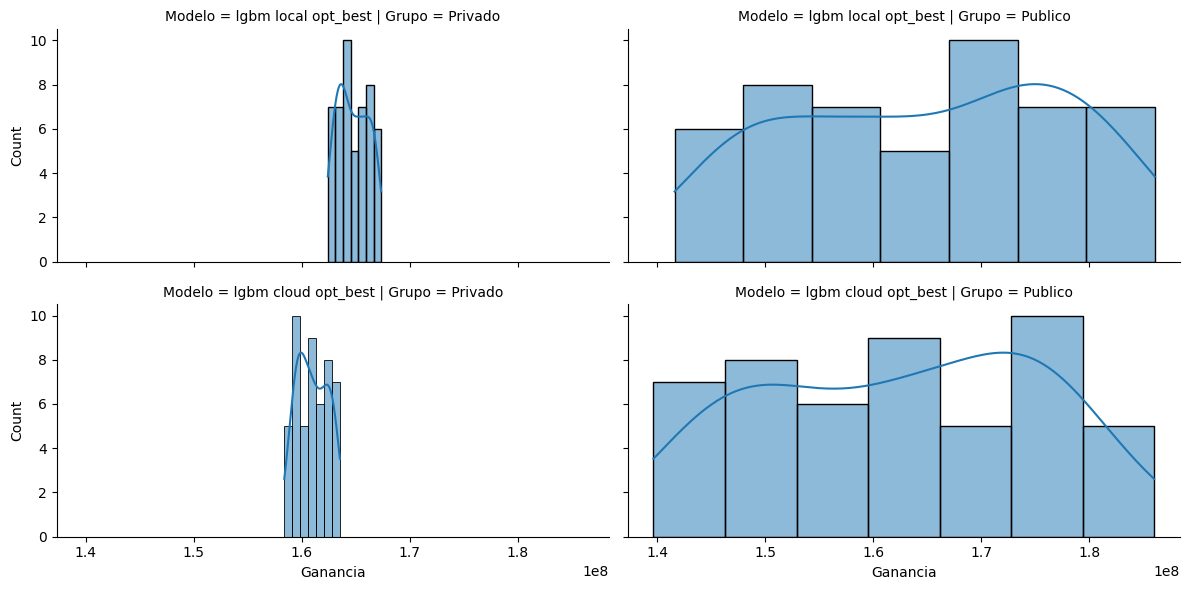

En este caso, ni siquiera hace falta un test para elegir al modelo lgbm local opt. Sin embargo, dado que el split es de 10 %, la diferencia en el score público es practicamente imperceptible.

> CONCLUSION:

Se optó por elegir el lgbm optizado localmente.



### Back-testing comparando meses

Este procedimiento, que fue ejectado para la comp02, no fue repetida, ya que es evidente que más datos (contar con más meses en el train) mejora el aprendizaje de los modelos.

### Back-testing para evaluar el umbral y comparar modelos

**Modelo lgbm optimizado**

Se entrenaron 12 modelos (variando semilla) con back-testing [202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105] vs 202107.

El umbral óptimo de estos modelos resulto ser:

- Umbral óptimo promedio: 0.01427
- Umbral óptime mediano: 0.01436

Notebook: comp03_back-testing

### Back-testing para evaluar semillerios

Notebook: comp03_back-testing_sem

**Modelo lgbm optimizado**

5 semilleríos de 10 semillas, muy costoso de entrenar por el tamaño del modelo.

De estas 50 iteraciones, agrupadas en promedio de a 10, se observa un umbrál optimo en 0.017, con ganancias máximas del orden de 165 millones.

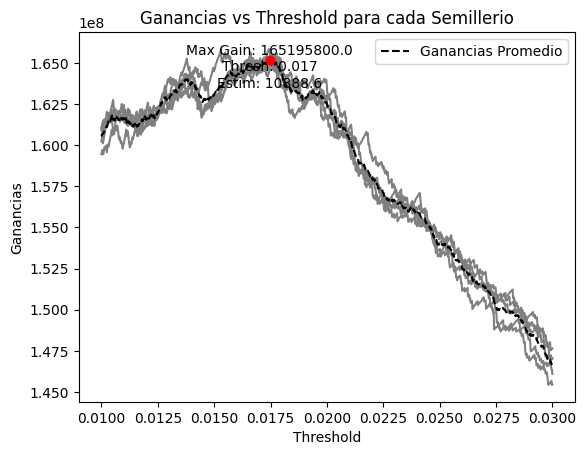

**Modelo semillerio**

Semillerio de Denicolay (presentado en la clase plenaria)

10 semillerios con 25 semillas cada uno.

In [ ]:
semillero_params = {'n_estimators': 23,
                  'num_leaves': 32,
                  'learning_rate': 0.34,
                  'min_data_in_leaf': 711,
                  'feature_fraction': 0.2,
                  'extra_trees': False,
}

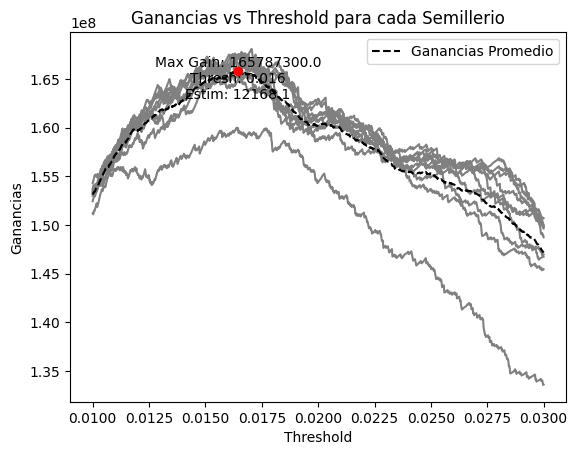

**Modelo semillerio comp02**

Modelo optimizado en competencia 02.

5 semilleríos de 10 semillas, muy costoso de entrenar por el tamaño del modelo.

In [ ]:
opt_params = {'n_estimators': 464, 
            'max_leaves': 228, 
            'eta': 0.026841741174110256, 
            'gamma': 0.6065611085207565, 
            'min_child_weight': 10, 
            'subsample': 0.8649413237261332, 
            'colsample_bytree': 0.5013152719066779}

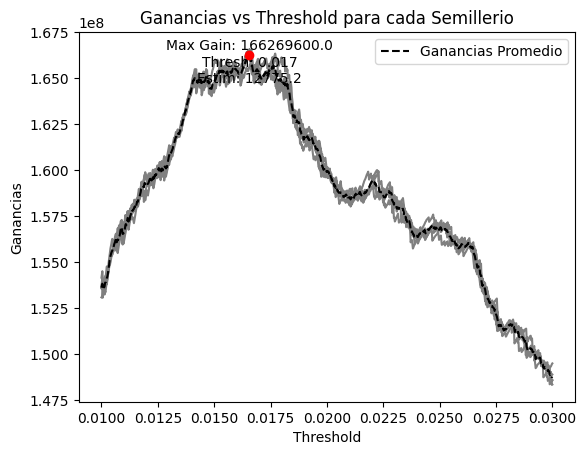

Comparación de semillerios:

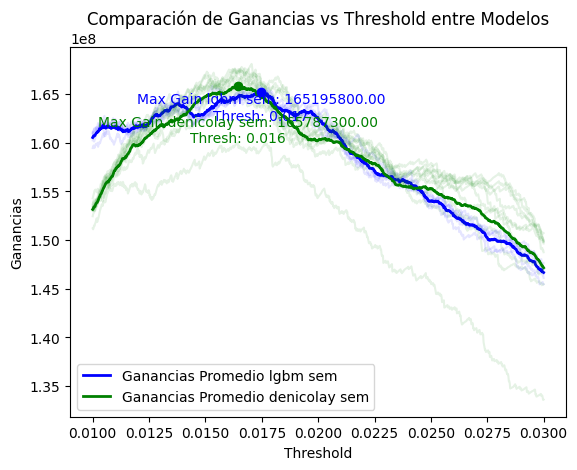

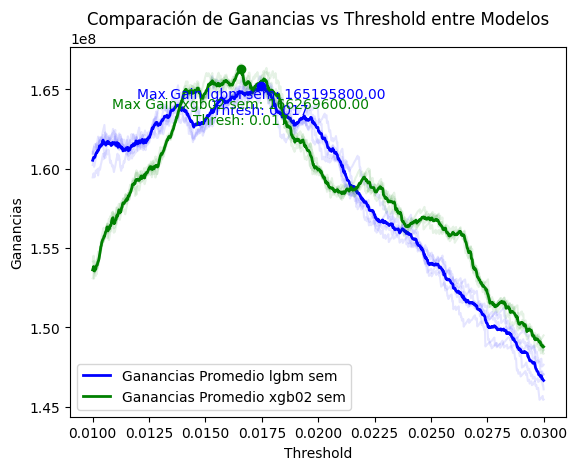

> CONCLUSION:

Los modelos son muy similares en un determinado rango de umbrales de probabilidad 0.015 a 0.017.

Sin embargo, el modelo xgb02 parece más "estable" en dicho rango.

> COMENTARIO:

Las ganancias estimadas en el back-testing parece exagerada, según los resultados de la comp01 y comp02. Esto puede deberse a: 

- Cambios que hice en el pipeline de entrenamiento (a chequear)
- Sobre-ajuste de la optimización, ya que durante la misma usé el mes 202107 (ahora set de prueba)
- Situación particular/aleatoria del mes de 202107
- Podría estar cometiendo un error de data leakage, sumbido en un overfitting terrible :X@#

## Modelo elegido

> **Modelo semillerio comp02**

Notebook: comp03_prediccionx

In [ ]:
###

## Uso de kaggle

Uso de envíos a kaggle para inferir el umbral óptimo de los datos.

In [ ]:
###

____

## Mejunje de semillerios

Ante la afirmación de que combinar modelos diferentes puede traer mejor rendimiento, procedo a hacer un rejunte de probas de distintos modelos semillerios:

- xgb optimizado 25 semillas, datos regulares
- lgbm semillerio profe mod, 100 semillas, datos regulares (elegido como entrega única)
- lgbm semillerio profe original, 100 semillas, datos x

In [25]:
xgb_probas = 'predicciones/probas/probas_pred_xgb_pr6_fe6_op3_tr9_sem10_24T-11-202416-43-48.csv'
lgbm_mod_probas = 'predicciones/probas/probas_pred_lgbm_mod_pr6_fe6_tr9_sem100_24T-11-202417-29-53.csv'
lgbm_orix_probas = 'predicciones/probas/probas_pred_lgbm_pr6_fe6x_tr9_sem100_24T-11-202415-47-58.csv'

columns = ['client', 'proba_sem_mean']

df_xgb_probas = pd.read_csv(xgb_probas,usecols=columns)
df_lgbm_mod_probas = pd.read_csv(lgbm_mod_probas,usecols=columns)
df_lgbm_orix_probas = pd.read_csv(lgbm_orix_probas,usecols=columns)

df_mejunje = df_xgb_probas.merge(df_lgbm_mod_probas, on='client', suffixes=("_xgb","_lgbm_mod"))
df_mejunje = df_mejunje.merge(df_lgbm_orix_probas, on='client', how='left')

df_mejunje.rename(columns={'proba_sem_mean': 'proba_sem_mean_lgbm_orix'}, inplace=True)

In [26]:
df_mejunje

,client,proba_sem_mean_xgb,proba_sem_mean_lgbm_mod,proba_sem_mean_lgbm_orix
0,874396751,0.000189,0.000169,0.000163
1,433266268,0.000515,0.000843,0.001019
2,602940488,0.001893,0.002509,0.001931
3,311885150,0.000973,0.001813,0.000974
4,561051836,0.000367,0.000587,0.000493
...,...,...,...,...
165437,304459714,0.002948,0.001576,0.002026
165438,298978008,0.000208,0.000161,0.000187
165439,477851904,0.001995,0.001839,0.002163
165440,872832537,0.000529,0.000320,0.000416


In [36]:
proba_s_columns = df_mejunje.filter(regex='^proba_sem_mean_')
proba_s_mean = proba_s_columns.mean(axis=1)

df_mejunje['proba_sem_mean_all'] = proba_s_mean

# Umbral
thr_opt_sem = 0.015

# Prediccion
df_mejunje['pred'] = np.where(df_mejunje.proba_sem_mean_all >= thr_opt_sem, 1, 0)

In [37]:
submission = pd.DataFrame({
    'numero_de_cliente': df_mejunje.client.values,
    'Predicted': df_mejunje['pred'].values
})

# Imprimir value counts de las predicciones
value_counts = submission['Predicted'].value_counts()
total_count = len(submission)
print("\nValue Counts:")
print(value_counts)
print("\nFrecuencia Relativa:")
print((value_counts / total_count) * 100)

submission.info()


Value Counts:
Predicted
0    152285
1     13157
Name: count, dtype: int64

Frecuencia Relativa:
Predicted
0    92.047364
1     7.952636
Name: count, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165442 entries, 0 to 165441
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   numero_de_cliente  165442 non-null  int64
 1   Predicted          165442 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 1.9 MB


In [31]:
import datetime

ft = "%dT-%m-%Y%H-%M-%S"
t_now = datetime.datetime.now().strftime(ft)

pred_name = f"pred_mejunje_"+t_now+".csv"

# Guardar el DataFrame en un archivo CSV
submission.to_csv('predicciones/'+pred_name, index=False)
print(f"Predicciones guardadas en{'predicciones/'+pred_name}")


Predicciones guardadas enpredicciones/pred_mejunje_24T-11-202418-18-06.csv


La intuición que tengo, según los comentarios de los Profesores, haría que elija esta predicción como entrega final, aunque debí hacer un back-testing acorde para probarlo.

El Profesor sopló que estaba overfitteando con esta entrega, por lo que volví a mi modelo elegido en las conclusiones.

_____